In [1]:
# Imports

import numpy as np 
import pandas as pd
import seaborn as sns
from pandas_datareader import data as web 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates 
%matplotlib inline

import datetime as dt 
import mplfinance as mpf

import time


import os
from os import listdir
from os.path import isfile, join

import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

In [2]:
# Default Values
PATH = "F:/Code/Python/Jupyter/Finance/datasets/Stock List/"

S_YEAR = 2017
S_MONTH = 1
S_DAY = 3
S_DATE_STR = "2017-01-03"
S_DATE_DATETIME = dt.datetime(S_YEAR, S_MONTH, S_DAY)

E_YEAR = 2021
E_MONTH = 8
E_DAY = 19
E_DATE_STR = "2021-08-19"
E_DATE_DATETIME = dt.datetime(E_YEAR, E_MONTH, E_DAY)

risk_free_rate = 0.0125

In [3]:
# Get Stock File Names in a List
files = [x for x in listdir(PATH) if isfile(join(PATH, x))]
tickers = [os.path.splitext(x)[0] for x in files]
len(tickers)

470

In [8]:
# Function that returns a dataframe from a csv
def get_df_from_csv(ticker):
    try:
        df = pd.read_csv(PATH + ticker + ".csv", index_col='Date', parse_dates=True)
    except FileNotFoundError:
        print("File doesn't exist")
    else:
        return df

In [9]:
def merge_df_by_column_name(col_name, sdate, edate, *tickers):
    mult_df = pd.DataFrame()
    
    for x in tickers:
        df = get_df_from_csv(x)
        mask = (df.index >= sdate) & (df.index <= edate)
        mult_df[x] = df.loc[mask][col_name]
        
    return mult_df

<h2>Markowitz Portfolio Optimization</h2>

In [6]:
# Stock portfolio
port_list = ["GNRC", "DXCM", "AMD", "NFLX", "COST", "TGT", "AES", "MSCI","NEM", "AMT", "HES"]

In [11]:
# Merge all stock prices into one dataframe
mult_df = merge_df_by_column_name('Adj Close', '2018-01-01', '2021-09-01', *port_list)

mult_df

,GNRC,DXCM,AMD,NFLX,COST,TGT,AES,MSCI,NEM,AMT,HES
Date,,,,,,,,,,,
2018-01-02,48.029999,57.990002,10.980000,201.070007,176.708481,61.060043,9.478336,122.557182,33.794189,130.570312,44.423561
2018-01-03,49.730000,58.080002,11.550000,205.050003,178.829147,60.644726,9.469624,124.419350,33.510796,131.079147,45.862576
2018-01-04,50.070000,52.250000,12.120000,205.630005,177.440430,59.452950,9.434777,126.377510,33.882751,129.164017,46.967361
2018-01-05,50.410000,53.259998,11.880000,209.990005,176.173615,60.084961,9.469624,127.692551,34.006725,129.996719,48.424942
2018-01-08,49.529999,55.439999,12.280000,212.050003,176.858612,60.653748,9.469624,127.865341,33.971306,131.384476,48.731312
...,...,...,...,...,...,...,...,...,...,...,...
2021-08-26,427.470001,517.059998,107.269997,550.119995,447.905426,247.041718,23.557798,621.724243,55.154793,280.472321,66.690216
2021-08-27,437.109985,520.710022,111.400002,558.919983,448.932190,247.260010,23.873611,627.384399,56.674149,282.770142,69.114418
2021-08-30,442.700012,521.539978,111.320000,566.179993,454.504730,247.438629,23.784790,636.193420,56.011864,288.891052,68.352524


<AxesSubplot:xlabel='Date'>

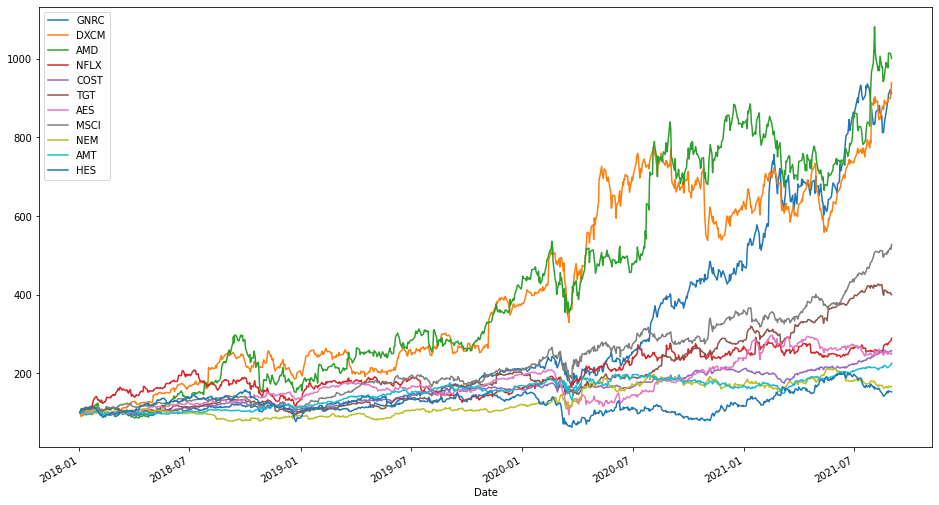

In [12]:
# Create plot of growth of investments over total merge dataset
(mult_df / mult_df.iloc[0] * 100).plot(figsize=(16,9))

In [15]:
# Mean returns
returns = np.log(mult_df / mult_df.shift(1))
mean_ret = returns.mean() * 252

mean_ret

GNRC    0.603930
DXCM    0.611672
AMD     0.629130
NFLX    0.290206
COST    0.258280
TGT     0.378749
AES     0.251418
MSCI    0.454220
NEM     0.139702
AMT     0.222634
HES     0.116579
dtype: float64

In [18]:
# Covarience
returns.cov() * 252

,GNRC,DXCM,AMD,NFLX,COST,TGT,AES,MSCI,NEM,AMT,HES
GNRC,0.158177,0.060042,0.086634,0.051509,0.036093,0.041703,0.065489,0.068016,0.025441,0.042557,0.080430
DXCM,0.060042,0.235076,0.093244,0.064115,0.029251,0.030375,0.043833,0.080819,0.021048,0.036899,0.057582
AMD,0.086634,0.093244,0.312339,0.102219,0.047212,0.057790,0.055183,0.094804,0.035416,0.041067,0.083015
NFLX,0.051509,0.064115,0.102219,0.169315,0.038625,0.031371,0.032153,0.064032,0.014270,0.030853,0.042998
COST,0.036093,0.029251,0.047212,0.038625,0.048621,0.033949,0.025571,0.036559,0.013217,0.030182,0.024942
TGT,0.041703,0.030375,0.057790,0.031371,0.033949,0.097813,0.038413,0.034676,0.009439,0.028463,0.040899
AES,0.065489,0.043833,0.055183,0.032153,0.025571,0.038413,0.144070,0.062084,0.021954,0.042066,0.093353
MSCI,0.068016,0.080819,0.094804,0.064032,0.036559,0.034676,0.062084,0.121816,0.026357,0.047370,0.069493
NEM,0.025441,0.021048,0.035416,0.014270,0.013217,0.009439,0.021954,0.026357,0.107000,0.020812,0.029820
AMT,0.042557,0.036899,0.041067,0.030853,0.030182,0.028463,0.042066,0.047370,0.020812,0.080631,0.037843


In [19]:
# Correlation
returns.corr()

,GNRC,DXCM,AMD,NFLX,COST,TGT,AES,MSCI,NEM,AMT,HES
GNRC,1.000000,0.311374,0.389768,0.314748,0.411569,0.335274,0.433823,0.489987,0.195552,0.376835,0.372538
DXCM,0.311374,1.000000,0.344116,0.321374,0.273605,0.200313,0.238184,0.477594,0.132711,0.268016,0.218779
AMD,0.389768,0.344116,1.000000,0.444497,0.383117,0.330627,0.260138,0.486030,0.193732,0.258780,0.273633
NFLX,0.314748,0.321374,0.444497,1.000000,0.425705,0.243769,0.205869,0.445860,0.106017,0.264060,0.192497
COST,0.411569,0.273605,0.383117,0.425705,1.000000,0.492284,0.305531,0.475036,0.183250,0.482042,0.208372
TGT,0.335274,0.200313,0.330627,0.243769,0.492284,1.000000,0.323592,0.317672,0.092266,0.320503,0.240900
AES,0.433823,0.238184,0.260138,0.205869,0.305531,0.323592,1.000000,0.468642,0.176821,0.390295,0.453069
MSCI,0.489987,0.477594,0.486030,0.445860,0.475036,0.317672,0.468642,1.000000,0.230862,0.477970,0.366784
NEM,0.195552,0.132711,0.193732,0.106017,0.183250,0.092266,0.176821,0.230862,1.000000,0.224065,0.167935
AMT,0.376835,0.268016,0.258780,0.264060,0.482042,0.320503,0.390295,0.477970,0.224065,1.000000,0.245504


In [37]:
# Generate random weights equal to 1
weights = np.random.random(11)
weights /= np.sum(weights)

print('Weights :', weights)
print('Total Weight :', np.sum(weights))

Weights : [0.11058855 0.05050875 0.14485822 0.14928034 0.12671574 0.08918185
 0.08706876 0.06572738 0.12164749 0.04693465 0.00748826]
Total Weight : 1.0000000000000002


In [38]:
# Calculate return of portfolio
np.sum(weights * returns.mean()) * 252

0.37870673964545637

In [39]:
# Calculation volatility
np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))

0.24072681986614256

In [41]:
# Analyze returns + risk of 10000 combinations
p_ret = [] # Returns list
p_vol = [] # Volatility list
p_SR = [] # Sharpe Ratio list
p_wt = [] # Stock weights list


for x in range(10000):
    # Generate random weights
    p_weights = np.random.random(11)
    p_weights /= np.sum(p_weights)
    
    # Get returns of the weights
    ret_1 = np.sum(p_weights * returns.mean()) * 252
    p_ret.append(ret_1)
    
    # Get volatility 
    vol_1 = np.sqrt(np.dot(p_weights.T, np.dot(returns.cov() * 252, p_weights)))
    p_vol.append(vol_1)

    # Get Sharpe ratio (more info below)
    SR_1 = (ret_1 - risk_free_rate) / vol_1
    p_SR.append(SR_1)
    
    p_wt.append(p_weights)
    
p_ret = np.array(p_ret)
p_vol = np.array(p_vol)
p_SR = np.array(p_SR)
p_wt = np.array(p_wt)

p_ret, p_vol, p_SR, p_wt

(array([0.3408912 , 0.36362815, 0.39463169, ..., 0.35696113, 0.360142  ,
        0.39270134]),
 array([0.24280911, 0.24048579, 0.24409946, ..., 0.24839926, 0.22284106,
        0.24054786]),
 array([1.35246657, 1.46007856, 1.56547533, ..., 1.38672366, 1.56004462,
        1.58056422]),
 array([[0.09577289, 0.13480358, 0.0213208 , ..., 0.19459365, 0.00806147,
         0.07282502],
        [0.09521321, 0.01338682, 0.16508319, ..., 0.07211794, 0.16901757,
         0.019983  ],
        [0.12448235, 0.11866442, 0.1222075 , ..., 0.1272693 , 0.0010128 ,
         0.09309938],
        ...,
        [0.09162326, 0.03044184, 0.07477511, ..., 0.02490975, 0.13113052,
         0.02611851],
        [0.09710064, 0.15171321, 0.03889798, ..., 0.14607518, 0.07355018,
         0.04043807],
        [0.12592047, 0.12726634, 0.09578538, ..., 0.1377169 , 0.07781762,
         0.04787528]]))

<AxesSubplot:xlabel='Volatility', ylabel='Return'>

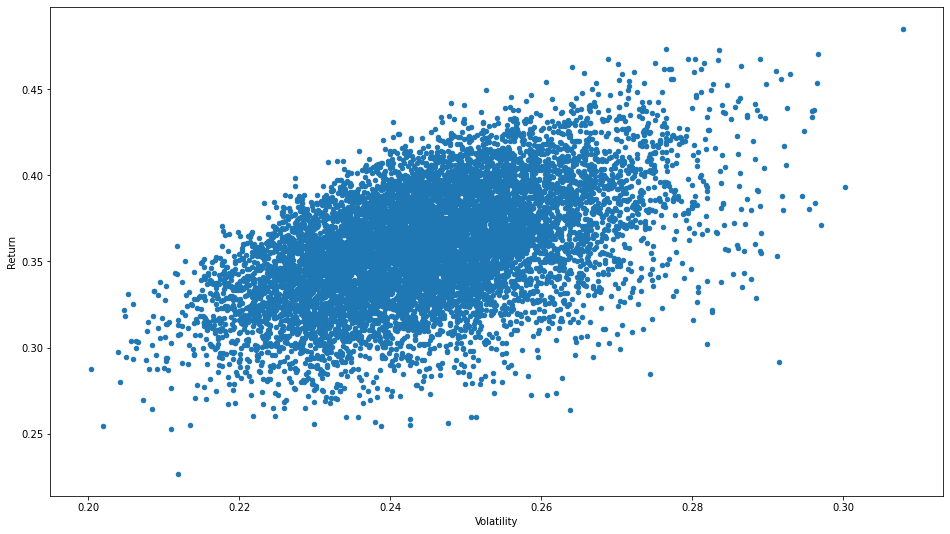

In [44]:
# Create plot for the efficient frontier
# On this plot you will be able to see what the return and volatility was for a specific randomized portfolio
ports = pd.DataFrame({'Return': p_ret, 'Volatility': p_vol})

ports.plot(x='Volatility', y='Return', kind='scatter', figsize=(16, 9))


<h2>Sharpe Ratio</h2>
<p>Maximize returns while avoiding as much risk as possible</p>
<p>More info: <a href='http://web.stanford.edu/~wfsharpe/art/sr/sr.htm'>here</a></p>

In [45]:
SR_idx = np.argmax(p_SR)

i = 0
while i < 11:
    print("Stock: %s : %2.2f" % (port_list[i], (p_wt[SR_idx][i] * 100)))
    i += 1

print("\nVolatility: ", p_vol[SR_idx])
print("Return: ", p_ret[SR_idx])

Stock: GNRC : 24.88
Stock: DXCM : 12.47
Stock: AMD : 2.09
Stock: NFLX : 2.54
Stock: COST : 10.12
Stock: TGT : 20.54
Stock: AES : 1.96
Stock: MSCI : 9.38
Stock: NEM : 1.78
Stock: AMT : 12.52
Stock: HES : 1.72

Volatility:  0.2403526181890456
Return:  0.4309127098265571
